# About this code:
#### I am gonna extract some simple data from ten official databases issued by the Modernisation Secretary office of Argentina.You can find this publics dfs on https://datos.gob.ar/dataset. Each one, shows every scientific project that has been presented in a particular year. [2008 - 2017]. ....

### The goal of this code is just practising data cleaning and data visualisation with Matplotlib.

In [2]:

# Crucial modules:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extra modules (Do not need this ones)
from sympy import *
from matplotlib import rcParams
init_printing()
x, h = symbols("x, h")
n = symbols("n", int = True)
f = symbols("f", cls = Function)



### Opening CSVs

In [12]:
mainpath = "C:/Users/Federico/Documents/Curso de Machine Learning/python-ml-course-master/datasets"
filename = "Proyectos cientificos Argentinos desde 2009 hasta 2017/proyectos_2009.csv"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv(fullpath, sep = ";")# ver que aca el separador esta especificado pues los separadores son punto y coma no comas
# Cuando está delimitado por un ",", no se especifica, pero aca el separador es ";"


In [3]:
proyectos_2008_df = open("proyectos_2008.csv", encoding="utf8")
proyectos_2009_df = open("proyectos_2009.csv", encoding="utf8")
proyectos_2010_df = open("proyectos_2010.csv", encoding="utf8")
proyectos_2011_df = open("proyectos_2011.csv", encoding="utf8")
proyectos_2012_df = open("proyectos_2012.csv", encoding="utf8")
proyectos_2013_df = open("proyectos_2013.csv", encoding="utf8", errors='ignore')
proyectos_2014_df = open("proyectos_2014.csv", encoding="utf8")
proyectos_2015_df = open("proyectos_2015.csv", encoding="utf8")
proyectos_2016_df = open("proyectos_2016.csv", encoding="utf8")
proyectos_2017_df = open("proyectos_2017.csv", encoding="utf8")


In [16]:
data.shape# La misma cantidad que haciendo el algoritmo de abajo

In [18]:
data.columns

Index(['proyecto_id', 'titulo', 'fecha_inicio', 'fecha_finalizacion',
       'monto_total_solicitado', 'monto_total_adjudicado',
       'monto_financiado_solicitado', 'monto_financiado_adjudicado',
       'cantidad_miembros_F', 'cantidad_miembros_M', 'sexo_director'],
      dtype='object')

In [22]:
data.columns.values

array(['proyecto_id', 'titulo', 'fecha_inicio', 'fecha_finalizacion',
       'monto_total_solicitado', 'monto_total_adjudicado',
       'monto_financiado_solicitado', 'monto_financiado_adjudicado',
       'cantidad_miembros_F', 'cantidad_miembros_M', 'sexo_director'],
      dtype=object)

In [23]:
data.describe()

,proyecto_id,monto_total_solicitado,monto_total_adjudicado,monto_financiado_solicitado,monto_financiado_adjudicado,cantidad_miembros_F,cantidad_miembros_M
count,1523.000000,1.146000e+03,1.523000e+03,1146.000000,1.523000e+03,1096.000000,1096.000000
mean,15457.278398,2.310980e+05,2.459957e+05,125392.635742,2.181803e+05,5.511861,6.790146
std,3491.125374,3.617193e+05,3.122084e+05,110396.107963,2.927593e+05,5.119739,8.603373
min,5838.000000,9.000000e+01,1.350000e+02,0.000000,1.350000e+02,0.000000,0.000000
25%,13959.500000,3.600000e+04,7.002301e+04,36000.000000,5.746006e+04,2.000000,1.000000
50%,16292.000000,1.000000e+05,1.744547e+05,90000.000000,1.400000e+05,4.000000,4.000000
75%,18569.500000,2.954058e+05,3.000000e+05,180000.000000,2.883500e+05,7.000000,8.000000
max,19307.000000,2.946703e+06,2.642745e+06,600000.000000,2.642745e+06,48.000000,79.000000


In [26]:
data.dtypes

proyecto_id                      int64
titulo                          object
fecha_inicio                    object
fecha_finalizacion              object
monto_total_solicitado         float64
monto_total_adjudicado         float64
monto_financiado_solicitado    float64
monto_financiado_adjudicado    float64
cantidad_miembros_F            float64
cantidad_miembros_M            float64
sexo_director                   object
dtype: object

In [32]:
pd.isnull(data["sexo_director"])#En los argumentos de esta funcion, se le puede pasar los nombres de las columnas

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1493    False
1494    False
1495    False
1496    False
1497    False
1498    False
1499    False
1500    False
1501    False
1502    False
1503    False
1504    False
1505    False
1506    False
1507    False
1508    False
1509    False
1510    False
1511    False
1512    False
1513    False
1514    False
1515    False
1516    False
1517    False
1518    False
1519    False
1520    False
1521    False
1522    False
Name: sexo_director, Length: 1523, dtype: bool

In [33]:
pd.isnull(data["sexo_director"][1000])# tambien se puede indexarle una celda en especifico

False

In [34]:
pd.notnull(data["sexo_director"])# tambien se puede indexarle una celda en especifico

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1493    True
1494    True
1495    True
1496    True
1497    True
1498    True
1499    True
1500    True
1501    True
1502    True
1503    True
1504    True
1505    True
1506    True
1507    True
1508    True
1509    True
1510    True
1511    True
1512    True
1513    True
1514    True
1515    True
1516    True
1517    True
1518    True
1519    True
1520    True
1521    True
1522    True
Name: sexo_director, Length: 1523, dtype: bool

In [35]:
pd.notnull(data["sexo_director"]).values

array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
pd.notnull(data["sexo_director"]).values.ravel()# Esto hace UNA SOLA unica lista 

array([ True,  True,  True, ...,  True,  True,  True])

In [39]:
# Ver que cuando sumamos los valores con la funcion "notnull()" devuelve la cantidad de filas, esto es por que:
# Como los valores Bool = True, tiene como valor real el numero "1", entonces la sumatoria suma "1" por cada ocurrencia de "True"
sum(pd.notnull(data["sexo_director"]).values.ravel())

1523

In [42]:
# En cambio, aqui la suma da 0. Esto es por que el valor del False es 0. Es decir, estamos sumando 0 por aca ocurrencia de Flase
pd.isnull(data["sexo_director"]).sum()

0

In [20]:
lista_de_columnas_de_data = list(data.columns)

In [21]:
lista_de_columnas_de_data

['proyecto_id',
 'titulo',
 'fecha_inicio',
 'fecha_finalizacion',
 'monto_total_solicitado',
 'monto_total_adjudicado',
 'monto_financiado_solicitado',
 'monto_financiado_adjudicado',
 'cantidad_miembros_F',
 'cantidad_miembros_M',
 'sexo_director']

### Converting to list

In [3]:
proyectos_2008_lista = list(proyectos_2008_df)
proyectos_2009_lista = list(proyectos_2009_df)
proyectos_2010_lista = list(proyectos_2010_df)
proyectos_2011_lista = list(proyectos_2011_df)
proyectos_2012_lista = list(proyectos_2012_df)
proyectos_2013_lista = list(proyectos_2013_df)
proyectos_2014_lista = list(proyectos_2014_df)
proyectos_2015_lista = list(proyectos_2015_df)
proyectos_2016_lista = list(proyectos_2016_df)
proyectos_2017_lista = list(proyectos_2017_df)

In [4]:
#cheking
proyectos_2009_lista[1000]

'18723;Diagnóstico de la compactación del suelo en siembra directa y técnicas para la descompactacion y su control;2009/01/01 00:00:00.000;2012/12/31 00:00:00.000;;113896.54;;113896.54;2;15;M\n'

## As the DFs columns are not the same length, i want to check

In [5]:
print("2008 df has {} columns".format(len (proyectos_2008_lista[0].split(";"))))
print("2009 df has {} columns".format(len (proyectos_2009_lista[0].split(";"))))
print("2010 df has {} columns".format(len (proyectos_2010_lista[0].split(";"))))
print("2011 df has {} columns".format(len (proyectos_2011_lista[0].split(";"))))
print("2012 df has {} columns".format(len (proyectos_2012_lista[0].split(";"))))
print("2013 df has {} columns".format(len (proyectos_2013_lista[0].split(";"))))
print("2014 df has {} columns".format(len (proyectos_2014_lista[0].split(";"))))
print("2015 df has {} columns".format(len (proyectos_2015_lista[0].split(";"))))
print("2016 df has {} columns".format(len (proyectos_2016_lista[0].split(";"))))
print("2017 df has {} columns".format(len (proyectos_2017_lista[0].split(";"))))


2008 df has 9 columns
2009 df has 11 columns
2010 df has 11 columns
2011 df has 11 columns
2012 df has 11 columns
2013 df has 11 columns
2014 df has 11 columns
2015 df has 11 columns
2016 df has 11 columns
2017 df has 9 columns


### The databases of the years 2008 and 2017 omitted the fields of the sex of each member of the research project, so I'm gonna caracterize then in two types.

####  "Columns_9"  the (#Column = 9) columns
####  "Columns_11" the (#Column = 11) columns

### As Columns_9 include the following:

##### -proyectos_2008; -proyectos_2017

### Columns_11 embrace:

##### -proyectos_2009; -proyectos_2010; -proyectos_2011; -proyectos_2012; -proyectos_2013; -proyectos_2014; -proyectos_2015; -proyectos_2016;


In [6]:
proyectos_2008_df.seek(0)
columnas_9 = proyectos_2008_df.readline().strip().split(";")
proyectos_2009_df.seek(0)
columnas_11 = proyectos_2009_df.readline().strip().split(";")

#### Checking

In [7]:
columnas_9

['proyecto_id',
 'titulo',
 'fecha_inicio',
 'fecha_finalizacion',
 'monto_total_solicitado',
 'monto_total_adjudicado',
 'monto_financiado_solicitado',
 'monto_financiado_adjudicado',
 'sexo_director']

In [8]:
columnas_11

['proyecto_id',
 'titulo',
 'fecha_inicio',
 'fecha_finalizacion',
 'monto_total_solicitado',
 'monto_total_adjudicado',
 'monto_financiado_solicitado',
 'monto_financiado_adjudicado',
 'cantidad_miembros_F',
 'cantidad_miembros_M',
 'sexo_director']

### Creating the Dicts with columns names as keys..

In [9]:
diccionario_08 = {}
for columna in columnas_9:
    diccionario_08[columna] = []
    
diccionario_09 = {}
for columna in columnas_11:
    diccionario_09[columna] = []

diccionario_10 = {}
for columna in columnas_11:
    diccionario_10[columna] = []

diccionario_11 = {}
for columna in columnas_11:
    diccionario_11[columna] = []

diccionario_12 = {}
for columna in columnas_11:
    diccionario_12[columna] = []

diccionario_13 = {}
for columna in columnas_11:
    diccionario_13[columna] = []

diccionario_14 = {}
for columna in columnas_11:
    diccionario_14[columna] = []

diccionario_15 = {}
for columna in columnas_11:
    diccionario_15[columna] = []

diccionario_16 = {}
for columna in columnas_11:
    diccionario_16[columna] = []

diccionario_17 = {}
for columna in columnas_9:
    diccionario_17[columna] = []

#### Checking one of each type

In [10]:
diccionario_08

{'proyecto_id': [],
 'titulo': [],
 'fecha_inicio': [],
 'fecha_finalizacion': [],
 'monto_total_solicitado': [],
 'monto_total_adjudicado': [],
 'monto_financiado_solicitado': [],
 'monto_financiado_adjudicado': [],
 'sexo_director': []}

In [11]:
diccionario_09

{'proyecto_id': [],
 'titulo': [],
 'fecha_inicio': [],
 'fecha_finalizacion': [],
 'monto_total_solicitado': [],
 'monto_total_adjudicado': [],
 'monto_financiado_solicitado': [],
 'monto_financiado_adjudicado': [],
 'cantidad_miembros_F': [],
 'cantidad_miembros_M': [],
 'sexo_director': []}

#### Creating the following lists for utility

In [12]:
Lista_diccionarios = [diccionario_08,diccionario_09,diccionario_10,diccionario_11,diccionario_12,diccionario_13,diccionario_14,diccionario_15,diccionario_16,diccionario_17]

In [13]:
Lista_listas = [proyectos_2008_lista, proyectos_2009_lista, proyectos_2010_lista, proyectos_2011_lista, proyectos_2012_lista, proyectos_2013_lista, proyectos_2014_lista, proyectos_2015_lista, proyectos_2016_lista, proyectos_2017_lista]

#### Filling the dict's lists with its values.
#### Printing Rows and Columns quantity

In [14]:
contador = 0
for linea in proyectos_2008_lista:
    valores = linea.strip("").split(";")
    for i in range(len(columnas_9)):
         diccionario_08[columnas_9[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_9)))

contador = 0
for linea in proyectos_2009_lista:
    valores = linea.strip("").split(";")
    for i in range(len(columnas_11)):
         diccionario_09[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11)))

contador = 0
for linea in proyectos_2010_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_11)):
         diccionario_10[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11)))

contador = 0
for linea in proyectos_2011_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_11)):
         diccionario_11[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11
)))

contador = 0
for linea in proyectos_2012_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_11)):
         diccionario_12[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11
)))

contador = 0
for linea in proyectos_2013_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_11)):
         diccionario_13[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11
)))
contador = 0
for linea in proyectos_2014_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_11)):
         diccionario_14[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11
)))

contador = 0
for linea in proyectos_2015_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_11)):
         diccionario_15[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11
)))
contador = 0
for linea in proyectos_2016_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_11)):
         diccionario_16[columnas_11[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_11
)))

contador = 0
for linea in proyectos_2017_lista:
    valores = linea.strip().split(";")
    for i in range(len(columnas_9)):
         diccionario_17[columnas_9[i]].append(valores[i])
    contador = contador + 1 
print("{} Rows - {} columns".format(contador, len(columnas_9)))

214 Rows - 9 columns
1524 Rows - 11 columns
1822 Rows - 11 columns
2119 Rows - 11 columns
2491 Rows - 11 columns
2313 Rows - 11 columns
2542 Rows - 11 columns
2211 Rows - 11 columns
1143 Rows - 11 columns
955 Rows - 9 columns


In [15]:
columnas_9

['proyecto_id',
 'titulo',
 'fecha_inicio',
 'fecha_finalizacion',
 'monto_total_solicitado',
 'monto_total_adjudicado',
 'monto_financiado_solicitado',
 'monto_financiado_adjudicado',
 'sexo_director']

In [16]:
columnas_11

['proyecto_id',
 'titulo',
 'fecha_inicio',
 'fecha_finalizacion',
 'monto_total_solicitado',
 'monto_total_adjudicado',
 'monto_financiado_solicitado',
 'monto_financiado_adjudicado',
 'cantidad_miembros_F',
 'cantidad_miembros_M',
 'sexo_director']

#### Next step:
##### Lets take the  average between women and man on each year. This can only be obtained form [2009 - 2016] dfs

In [17]:
cardinal_09 = len(diccionario_09["cantidad_miembros_F"][1:])
cardinal_10 = len(diccionario_10["cantidad_miembros_F"][1:])
cardinal_11 = len(diccionario_11["cantidad_miembros_F"][1:])
cardinal_12 = len(diccionario_12["cantidad_miembros_F"][1:])
cardinal_13 = len(diccionario_13["cantidad_miembros_F"][1:])
cardinal_14 = len(diccionario_14["cantidad_miembros_F"][1:])
cardinal_15 = len(diccionario_15["cantidad_miembros_F"][1:])
cardinal_16 = len(diccionario_16["cantidad_miembros_F"][1:])


In [18]:
V = [cardinal_09,
     cardinal_10,
     cardinal_11,
     cardinal_12,
     cardinal_13,
     cardinal_14,
     cardinal_15,
     cardinal_16]


In [19]:
V

In [20]:
l_mm_09 = []
l_mm_10 = []
l_mm_11 = []
l_mm_12 = []
l_mm_13 = []
l_mm_14 = []
l_mm_15 = []
l_mm_16 = []
#-----------
l_mf_09 = []
l_mf_10 = []
l_mf_11 = []
l_mf_12 = []
l_mf_13 = []
l_mf_14 = []
l_mf_15 = []
l_mf_16 = []


##### Handling empty celds and mooving data to lists

In [21]:
# Womens / mujeres

for i in (diccionario_09["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_09.append(i)


for i in (diccionario_10["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_10.append(i)


for i in (diccionario_11["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_11.append(i)


for i in (diccionario_12["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_12.append(i)


for i in (diccionario_13["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_13.append(i)


for i in (diccionario_14["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_14.append(i)


for i in (diccionario_15["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_15.append(i)


for i in (diccionario_16["cantidad_miembros_F"][1:]):
    if i != "":
        i = ( int(i))
        l_mf_16.append(i)

# Mans - hombres _____________________________________________________________________________

for i in (diccionario_09["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_09.append(i)


for i in (diccionario_10["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_10.append(i)


for i in (diccionario_11["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_11.append(i)


for i in (diccionario_12["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_12.append(i)


for i in (diccionario_13["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_13.append(i)


for i in (diccionario_14["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_14.append(i)


for i in (diccionario_15["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_15.append(i)


for i in (diccionario_16["cantidad_miembros_M"][1:]):
    if i != "":
        i = ( int(i))
        l_mm_16.append(i)


     

##### Saving the cardinal of each list on Femenine and Masculine members

In [22]:
cardinal_l_mm_09 = len(l_mm_09)
cardinal_l_mm_10 = len(l_mm_10)
cardinal_l_mm_11 = len(l_mm_11)
cardinal_l_mm_12 = len(l_mm_12)
cardinal_l_mm_13 = len(l_mm_13)
cardinal_l_mm_14 = len(l_mm_14)
cardinal_l_mm_15 = len(l_mm_15)
cardinal_l_mm_16 = len(l_mm_16)

cardinal_l_mf_09 = len(l_mf_09)
cardinal_l_mf_10 = len(l_mf_10)
cardinal_l_mf_11 = len(l_mf_11)
cardinal_l_mf_12 = len(l_mf_12)
cardinal_l_mf_13 = len(l_mf_13)
cardinal_l_mf_14 = len(l_mf_14)
cardinal_l_mf_15 = len(l_mf_15)
cardinal_l_mf_16 = len(l_mf_16)

In [23]:
U= [cardinal_l_mm_09,
    cardinal_l_mm_10,
    cardinal_l_mm_11,
    cardinal_l_mm_12,
    cardinal_l_mm_13,
    cardinal_l_mm_14,
    cardinal_l_mm_15,
    cardinal_l_mm_16,
    cardinal_l_mf_09,
    cardinal_l_mf_10,
    cardinal_l_mf_11,
    cardinal_l_mf_12,
    cardinal_l_mf_13,
    cardinal_l_mf_14,
    cardinal_l_mf_15,
    cardinal_l_mf_16]

In [24]:
U

#### Average on each per year

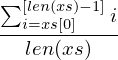

In [25]:
# Ignore this. Just testing latex render.

C0, C1, xxs = symbols("[len(xs)-1], len(xs), xs[0]")
i = symbols("i", int = True)
Sum(i, (i, xxs, C0))*1/C1

In [26]:
Promedio_M_2009 = (sum(l_mm_09)/len(l_mm_09))
Promedio_M_2010 = (sum(l_mm_10)/len(l_mm_10))
Promedio_M_2011 = (sum(l_mm_11)/len(l_mm_11))
Promedio_M_2012 = (sum(l_mm_12)/len(l_mm_12))
Promedio_M_2013 = (sum(l_mm_13)/len(l_mm_13))
Promedio_M_2014 = (sum(l_mm_14)/len(l_mm_14))
Promedio_M_2015 = (sum(l_mm_15)/len(l_mm_15))
Promedio_M_2016 = (sum(l_mm_16)/len(l_mm_16))

Promedio_F_2009 = (sum(l_mf_09)/len(l_mf_09))
Promedio_F_2010 = (sum(l_mf_10)/len(l_mf_10))
Promedio_F_2011 = (sum(l_mf_11)/len(l_mf_11))
Promedio_F_2012 = (sum(l_mf_12)/len(l_mf_12))
Promedio_F_2013 = (sum(l_mf_13)/len(l_mf_13))
Promedio_F_2014 = (sum(l_mf_14)/len(l_mf_14))
Promedio_F_2015 = (sum(l_mf_15)/len(l_mf_15))
Promedio_F_2016 = (sum(l_mf_16)/len(l_mf_16))

In [27]:
Promedios_F_09_16 = [Promedio_F_2009,
    Promedio_F_2010,
    Promedio_F_2011,
    Promedio_F_2012,
    Promedio_F_2013,
    Promedio_F_2014,
    Promedio_F_2015,
    Promedio_F_2016]

In [28]:
Promedios_F_09_16

In [29]:
Promedios_M_09_16 = [Promedio_M_2009,
    Promedio_M_2010,
    Promedio_M_2011,
    Promedio_M_2012,
    Promedio_M_2013,
    Promedio_M_2014,
    Promedio_M_2015,
    Promedio_M_2016]

In [30]:
Promedios_M_09_16

#### testing plot

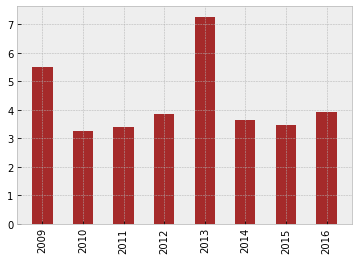

In [31]:
x = range( len(V))
y = Promedios_F_09_16
plt.style.use("bmh")
plt.bar(x, y, color = "brown", width = 0.5)
plt.xticks(range(len(x)), ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], rotation = 'vertical')
plt.grid(True)
plt.show()

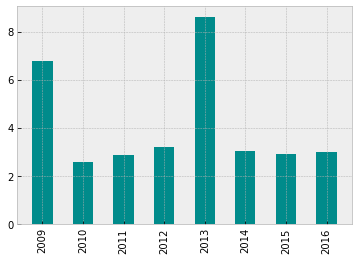

In [32]:
x1 = range( len(V))
y1 = Promedios_M_09_16
plt.style.use("bmh")
plt.bar(x1, y1, color = "darkcyan", width = 0.5)
plt.xticks(range(len(x)), ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], rotation = 'vertical')
plt.grid(True)
plt.show()

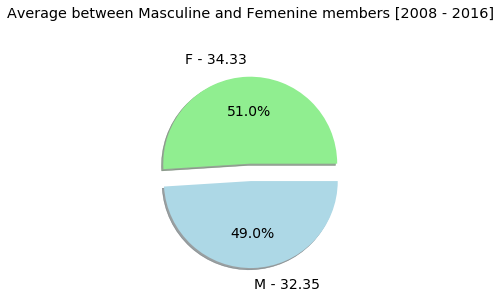

In [33]:
x = [(sum(Promedios_F_09_16)), sum((Promedios_M_09_16))]
plt.title("Average between Masculine and Femenine members [2008 - 2016]\n\n\n")
etiquetas = ['F - 34.33\n', '\nM - 32.35']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['lightgreen', 'lightblue'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

#### Now let's take the whole members and calculate precisely

In [34]:
Total_Miembros_M = [sum(l_mm_09),
    sum(l_mm_10),
    sum(l_mm_11),
    sum(l_mm_12),
    sum(l_mm_13),
    sum(l_mm_14),
    sum(l_mm_15),
    sum(l_mm_16) ,  
]

Total_Miembros_F = [sum(l_mf_09),
    sum(l_mf_10),
    sum(l_mf_11),
    sum(l_mf_12),
    sum(l_mf_13),
    sum(l_mf_14),
    sum(l_mf_15),
    sum(l_mf_16) ,  
]

In [35]:
Total_Miembros_M

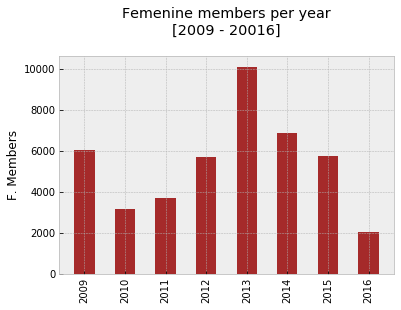

In [36]:
x = range( len(V))
y = Total_Miembros_F
plt.style.use("bmh")
plt.title("Femenine members per year\n[2009 - 20016]\n")
plt.ylabel("F. Members")
plt.bar(x, y, color = "brown", width = 0.5)
plt.xticks(range(len(x)), ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], rotation = 'vertical')
plt.grid(True)
plt.show()

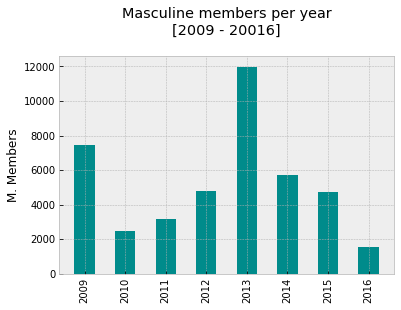

In [37]:
x1 = range( len(V))
y1 = Total_Miembros_M
plt.style.use("bmh")
plt.title("Masculine members per year\n[2009 - 20016]\n")
plt.ylabel("M. Members")
plt.bar(x1, y1, color = "darkcyan", width = 0.5)
plt.xticks(range(len(x)), ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], rotation = 'vertical')
plt.grid(True)
plt.show()

#### On the next list, we can observe that the number of projects that specify the gender of each of its members differs from the total. 'V' could be seen as the total of scientific projects per year, but, does all of them specify the data I am looking? no, the next list shows only the numbers of projects that do include this data. 

In [38]:
V

#### As we can see, only 1096 of 1523 projects have specified the gender of its scientist in the year 2009

In [39]:
U[8:]

#### Testing plot

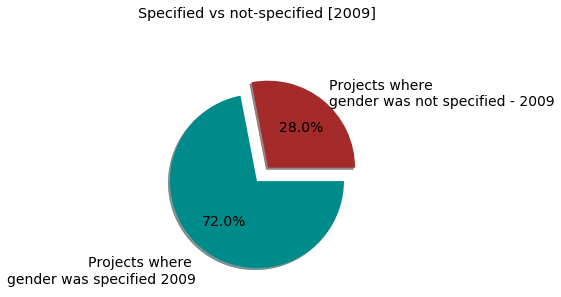

We can demostrate that it's correct by taking (1523*28)/100 it must give the difference between 1523 and 1096
I'll show only the first of them
(1523*28)/100 = 426.44
1523 - 1096 = 427


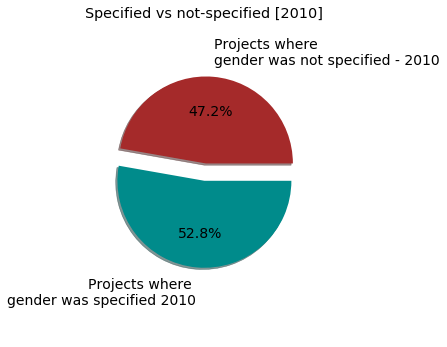

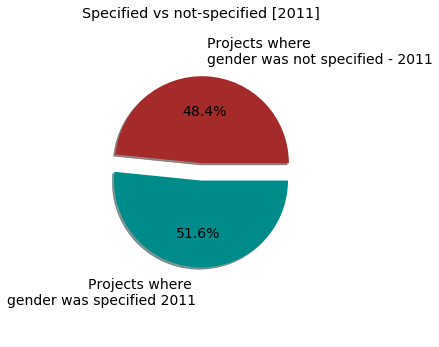

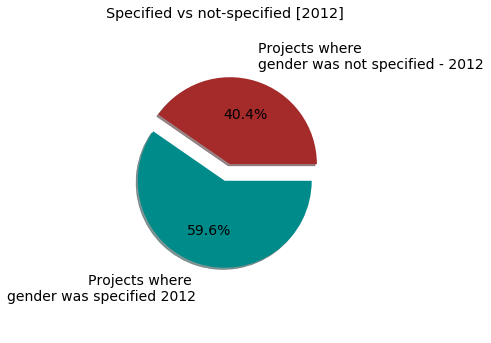

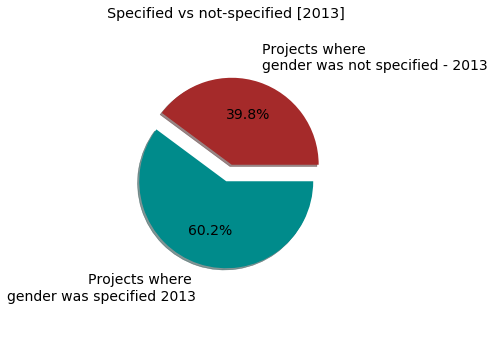

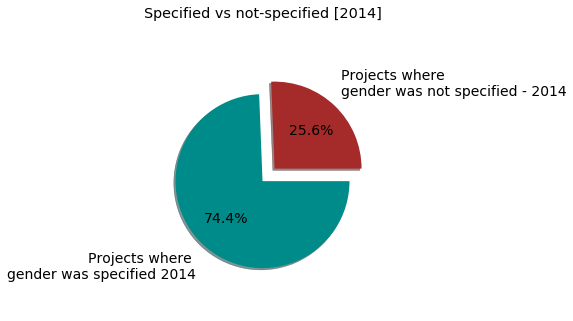

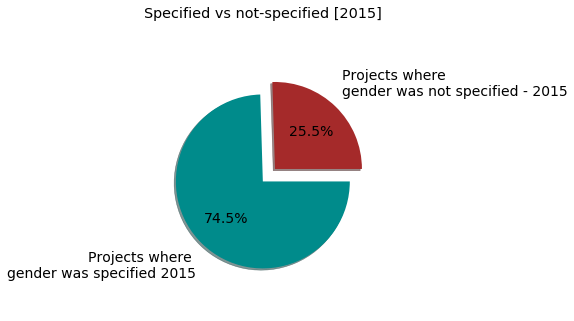

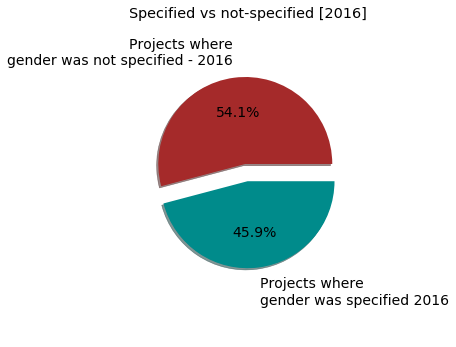

In [40]:
plt.subplot(1, 1, 1)
x = [(V[0] - U[8:][0]), U[0]]
plt.title("Specified vs not-specified [2009]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2009', '\n\nProjects where \ngender was specified 2009']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

print("We can demostrate that it's correct by taking (1523*28)/100 it must give the difference between 1523 and 1096\nI'll show only the first of them")
print("(1523*28)/100 = {}".format((1523*28)/100))
print("1523 - 1096 = {}".format((1523 - 1096)))

plt.subplot(1, 1, 1)
x = [(V[1] - U[8:][1]), U[1]]
plt.title("Specified vs not-specified [2010]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2010\n\n', '\n\n\n\nProjects where \ngender was specified 2010\n\n']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

plt.subplot(1, 1, 1)
x = [(V[2] - U[8:][2]), U[2]]
plt.title("Specified vs not-specified [2011]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2011\n\n', '\n\n\n\nProjects where \ngender was specified 2011\n\n']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

plt.subplot(1, 1, 1)
x = [(V[3] - U[8:][3]), U[3]]
plt.title("Specified vs not-specified [2012]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2012\n\n', '\n\n\n\nProjects where \ngender was specified 2012\n\n']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

plt.subplot(1, 1, 1)
x = [(V[4] - U[8:][4]), U[4]]
plt.title("Specified vs not-specified [2013]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2013\n\n', '\n\n\n\nProjects where \ngender was specified 2013\n\n']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

plt.subplot(1, 1, 1)
x = [(V[5] - U[8:][5]), U[5]]
plt.title("Specified vs not-specified [2014]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2014\n\n', '\n\n\n\nProjects where \ngender was specified 2014\n\n']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

plt.subplot(1, 1, 1)
x = [(V[6] - U[8:][6]), U[6]]
plt.title("Specified vs not-specified [2015]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2015\n\n', '\n\n\n\nProjects where \ngender was specified 2015\n\n']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()

plt.subplot(1, 1, 1)
x = [(V[7] - U[8:][7]), U[7]]
plt.title("Specified vs not-specified [2016]\n\n\n")
etiquetas = ['Projects where\ngender was not specified - 2016\n\n', '\n\n\n\nProjects where \ngender was specified 2016\n\n']
sizes = [15, 30]
plt.axis('equal')
plt.grid(True)
explode = (0.2, 0)
plt.pie(x, labels = etiquetas, colors = ['brown', 'darkcyan'], autopct = '%1.1f%%', textprops = {'fontsize': 14}, explode=explode, shadow=True, startangle=0)
plt.show()





#### Now, the last column of the dfs. represent the sex of the director of the project, as it sees below.

In [41]:
columnas_9

['proyecto_id',
 'titulo',
 'fecha_inicio',
 'fecha_finalizacion',
 'monto_total_solicitado',
 'monto_total_adjudicado',
 'monto_financiado_solicitado',
 'monto_financiado_adjudicado',
 'sexo_director']

In [42]:
columnas_11

['proyecto_id',
 'titulo',
 'fecha_inicio',
 'fecha_finalizacion',
 'monto_total_solicitado',
 'monto_total_adjudicado',
 'monto_financiado_solicitado',
 'monto_financiado_adjudicado',
 'cantidad_miembros_F',
 'cantidad_miembros_M',
 'sexo_director']

#### As we can appraise, the two types of dfs admit this value as well, so lets take the dfs. of 2008 and 2017.
#### Then, if we explore the .csv we can see there are fields which value is "S/D". It means data is missing, or they simply decided not to share it. 

### Lists as:

In [43]:
sexo_director_08 = []
sexo_director_09 = []
sexo_director_10 = []
sexo_director_11 = []
sexo_director_12 = []
sexo_director_13 = []
sexo_director_14 = []
sexo_director_15 = []
sexo_director_16 = []
sexo_director_17 = []


#### Moving from Dicts, to lists and handling empty celds

In [44]:
for i in (diccionario_08["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_08.append(i)

for i in (diccionario_09["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_09.append(i)
        
for i in (diccionario_10["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_10.append(i)
        
for i in (diccionario_11["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_11.append(i)
        
for i in (diccionario_12["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_12.append(i)
        
for i in (diccionario_13["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_13.append(i)

for i in (diccionario_14["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_14.append(i)

for i in (diccionario_15["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_15.append(i)

for i in (diccionario_16["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_16.append(i)

for i in (diccionario_17["sexo_director"][1:]):
    if i != "":
        i = ( str(i))
        sexo_director_17.append(i)


### The next lists are ordered as the following:

#### xs_L_year = [[Masculine::Str],[Femenine::Str],['S/D'::Str]]
#### ys_Q_year = [[Masculine::Int],[Femenine::Int],['S/D'::Int]]
#### zx_Q_M = [Int]
#### wx_Q_F = [Int]
#### sx_Q_SD = [Int]

In [45]:
Sexo_director_L_08 = [[],[],[]]
Sexo_director_L_09 = [[],[],[]]
Sexo_director_L_10 = [[],[],[]]
Sexo_director_L_11 = [[],[],[]]
Sexo_director_L_12 = [[],[],[]]
Sexo_director_L_13 = [[],[],[]]
Sexo_director_L_14 = [[],[],[]]
Sexo_director_L_15 = [[],[],[]]
Sexo_director_L_16 = [[],[],[]]
Sexo_director_L_17 = [[],[],[]]

Sexo_director_Q_08 = [[],[],[]]
Sexo_director_Q_09 = [[],[],[]]
Sexo_director_Q_10 = [[],[],[]]
Sexo_director_Q_11 = [[],[],[]]
Sexo_director_Q_12 = [[],[],[]]
Sexo_director_Q_13 = [[],[],[]]
Sexo_director_Q_14 = [[],[],[]]
Sexo_director_Q_15 = [[],[],[]]
Sexo_director_Q_16 = [[],[],[]]
Sexo_director_Q_17 = [[],[],[]]

Sexo_director_Q_M = []
Sexo_director_Q_F = []
Sexo_director_Q_SD = []

In [46]:
# Filling the lists of Str

for i in sexo_director_08:
    if i == 'M\n':
        Sexo_director_L_08[0].append(i[:1])
    elif i == 'F\n':
        Sexo_director_L_08[1].append(i[:1])
    else:
        Sexo_director_L_08[2].append(i[:3])
        
for i in sexo_director_09:
    if i == 'M\n':
        Sexo_director_L_09[0].append(i[:1])
    elif i == 'F\n':
        Sexo_director_L_09[1].append(i[:1])
    else:
        Sexo_director_L_09[2].append(i[:3])
        
for i in sexo_director_10:
    if i == 'M':
        Sexo_director_L_10[0].append(i)
    elif i == 'F':
        Sexo_director_L_10[1].append(i)
    else:
        Sexo_director_L_10[2].append(i)
        
for i in sexo_director_11:
    if i == 'M':
        Sexo_director_L_11[0].append(i)
    elif i == 'F':
        Sexo_director_L_11[1].append(i)
    else:
        Sexo_director_L_11[2].append(i)
        
for i in sexo_director_12:
    if i == 'M':
        Sexo_director_L_12[0].append(i)
    elif i == 'F':
        Sexo_director_L_12[1].append(i)
    else:
        Sexo_director_L_12[2].append(i)
        
for i in sexo_director_13:
    if i == 'M':
        Sexo_director_L_13[0].append(i)
    elif i == 'F':
        Sexo_director_L_13[1].append(i)
    else:
        Sexo_director_L_13[2].append(i)
        
for i in sexo_director_14:
    if i == 'M':
        Sexo_director_L_14[0].append(i)
    elif i == 'F':
        Sexo_director_L_14[1].append(i)
    else:
        Sexo_director_L_14[2].append(i)
        
for i in sexo_director_15:
    if i == 'M':
        Sexo_director_L_15[0].append(i)
    elif i == 'F':
        Sexo_director_L_15[1].append(i)
    else:
        Sexo_director_L_15[2].append(i)
        
for i in sexo_director_16:
    if i == 'M':
        Sexo_director_L_16[0].append(i)
    elif i == 'F':
        Sexo_director_L_16[1].append(i)
    else:
        Sexo_director_L_16[2].append(i)
        
for i in sexo_director_17:
    if i == 'M':
        Sexo_director_L_17[0].append(i)
    elif i == 'F':
        Sexo_director_L_17[1].append(i)
    else:
        Sexo_director_L_17[2].append(i)
        
        
# Filling the lists of Quantity 

k = 0
j = 0
r = 0
for i in sexo_director_08:
    if i == 'M\n':
        k = k + 1
        Sexo_director_Q_08[0] = k
    elif i == 'F\n':
        j  = j  + 1
        Sexo_director_Q_08[1] = j
    else:
        r = r + 1
        Sexo_director_Q_08[2] = r
        
Sexo_director_Q_M.append(Sexo_director_Q_08[0])
Sexo_director_Q_F.append(Sexo_director_Q_08[1])
Sexo_director_Q_SD.append(Sexo_director_Q_08[2])
        
        
k = 0
j = 0
r = 0
for i in sexo_director_09:
    if i == 'M\n':
        k = k + 1
        Sexo_director_Q_09[0] = k
    elif i == 'F\n':
        j  = j  + 1
        Sexo_director_Q_09[1] = j
    else:
        r = r + 1
        Sexo_director_Q_09[2] = r

Sexo_director_Q_M.append(Sexo_director_Q_09[0])
Sexo_director_Q_F.append(Sexo_director_Q_09[1])
Sexo_director_Q_SD.append(Sexo_director_Q_09[2])
        
        
k = 0
j = 0
r = 0
for i in sexo_director_10:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_10[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_10[1] = j
    else:
        r = r + 1
        Sexo_director_Q_10[2] = r

Sexo_director_Q_M.append(Sexo_director_Q_10[0])
Sexo_director_Q_F.append(Sexo_director_Q_10[1])
Sexo_director_Q_SD.append(Sexo_director_Q_10[2])
              
            
k = 0
j = 0
r = 0
for i in sexo_director_11:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_11[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_11[1] = j
    else:
        r = r + 1
        Sexo_director_Q_11[2] = r

Sexo_director_Q_M.append(Sexo_director_Q_11[0])
Sexo_director_Q_F.append(Sexo_director_Q_11[1])
Sexo_director_Q_SD.append(Sexo_director_Q_11[2])

k = 0
j = 0
r = 0
for i in sexo_director_12:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_12[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_12[1] = j
    else:
        r = r + 1
        Sexo_director_Q_12[2] = r
        
Sexo_director_Q_M.append(Sexo_director_Q_12[0])
Sexo_director_Q_F.append(Sexo_director_Q_12[1])
Sexo_director_Q_SD.append(Sexo_director_Q_12[2])

k = 0
j = 0
r = 0
for i in sexo_director_13:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_13[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_13[1] = j
    else:
        r = r + 1
        Sexo_director_Q_13[2] = r

Sexo_director_Q_M.append(Sexo_director_Q_13[0])
Sexo_director_Q_F.append(Sexo_director_Q_13[1])
Sexo_director_Q_SD.append(Sexo_director_Q_13[2])


k = 0
j = 0
r = 0
for i in sexo_director_14:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_14[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_14[1] = j
    else:
        r = r + 1
        Sexo_director_Q_14[2] = r

Sexo_director_Q_M.append(Sexo_director_Q_14[0])
Sexo_director_Q_F.append(Sexo_director_Q_14[1])
Sexo_director_Q_SD.append(Sexo_director_Q_14[2])
        

k = 0
j = 0
r = 0
for i in sexo_director_15:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_15[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_15[1] = j
    else:
        r = r + 1
        Sexo_director_Q_15[2] = r
        
Sexo_director_Q_M.append(Sexo_director_Q_15[0])
Sexo_director_Q_F.append(Sexo_director_Q_15[1])
Sexo_director_Q_SD.append(Sexo_director_Q_15[2])
        

k = 0
j = 0
r = 0
for i in sexo_director_16:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_16[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_16[1] = j
    else:
        r = r + 1
        Sexo_director_Q_16[2] = r

Sexo_director_Q_M.append(Sexo_director_Q_16[0])
Sexo_director_Q_F.append(Sexo_director_Q_16[1])
Sexo_director_Q_SD.append(Sexo_director_Q_16[2])

k = 0
j = 0
r = 0
for i in sexo_director_17:
    if i == 'M':
        k = k + 1
        Sexo_director_Q_17[0] = k
    elif i == 'F':
        j  = j  + 1
        Sexo_director_Q_17[1] = j
    else:
        r = r + 1
        Sexo_director_Q_17[2] = r

Sexo_director_Q_M.append(Sexo_director_Q_17[0])
Sexo_director_Q_F.append(Sexo_director_Q_17[1])
Sexo_director_Q_SD.append(Sexo_director_Q_17[2])

In [47]:
len(Sexo_director_Q_M) == len(Sexo_director_Q_F) == len(Sexo_director_Q_SD) 

True

### Ploting data

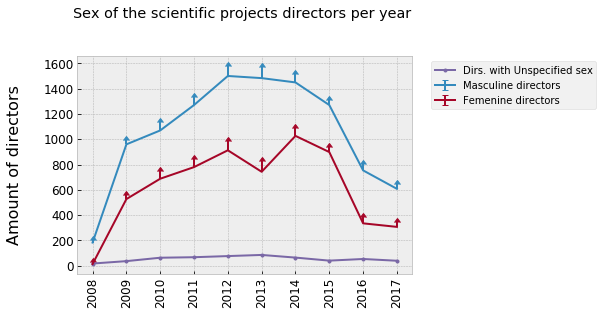

In [48]:
x1 = list( range(10))
plt.style.use("bmh")
yerr2 = np.linspace(2, 3, 10)

plt.title("Sex of the scientific projects directors per year \n\n")
plt.ylabel("Amount of directors\n", fontsize=16)
plt.xticks(x1, ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation = 'vertical')
plt.style.use("bmh")
plt.tick_params(axis='both', labelsize = 12)
plt.errorbar(x1, Sexo_director_Q_M, yerr = Sexo_director_Q_SD , lolims=True, label = "Masculine directors")
plt.errorbar(x1, Sexo_director_Q_F, yerr = Sexo_director_Q_SD , lolims=True, label = "Femenine directors") 
plt.plot(x1, Sexo_director_Q_SD, ".-",label = "Dirs. with Unspecified sex")
plt.legend(["Dirs. with Unspecified sex", "Masculine directors", "Femenine directors"], bbox_to_anchor=(1.04,1), loc = "upper left")


plt.grid(True)
plt.show()

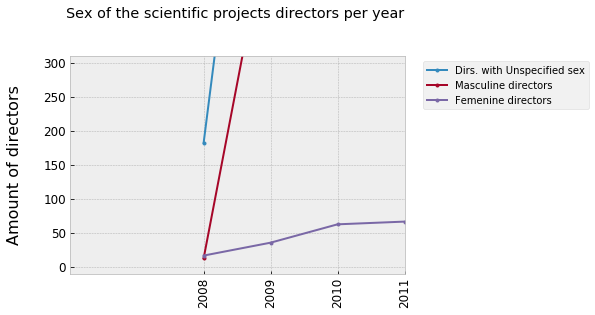

In [49]:
x1 = list( range(10))
plt.title("Sex of the scientific projects directors per year \n\n")
plt.ylabel("Amount of directors\n", fontsize=16)
plt.xticks(x1, ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation = 'vertical')
plt.style.use("bmh")
plt.tick_params(axis='both', labelsize = 12)
plt.plot(x1, Sexo_director_Q_M, ".-")
plt.plot(x1, Sexo_director_Q_F, ".-")
plt.plot(x1, Sexo_director_Q_SD, ".-")
plt.ylim(-10, 310)
plt.xlim(-2, 3)
plt.legend(["Dirs. with Unspecified sex", "Masculine directors", "Femenine directors"], bbox_to_anchor=(1.04,1), loc = "upper left")

plt.grid(True)
plt.show()

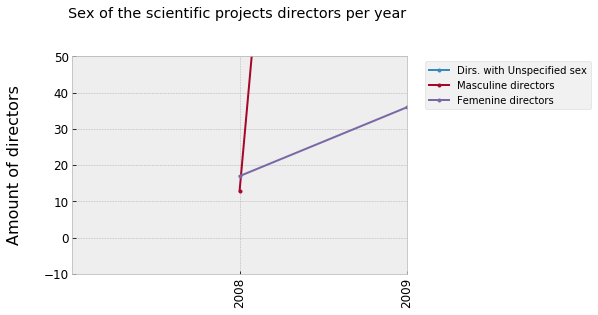

In [50]:
x1 = list( range(10))
plt.title("Sex of the scientific projects directors per year \n\n")
plt.ylabel("Amount of directors\n", fontsize=16)
plt.xticks(x1, ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation = 'vertical')
plt.style.use("bmh")
plt.tick_params(axis='both', labelsize = 12)
plt.plot(x1, Sexo_director_Q_M, ".-")
plt.plot(x1, Sexo_director_Q_F, ".-")
plt.plot(x1, Sexo_director_Q_SD, ".-")
plt.ylim(-10, 50)
plt.xlim(-1, 1)
plt.legend(["Dirs. with Unspecified sex", "Masculine directors", "Femenine directors"], bbox_to_anchor=(1.04,1), loc = "upper left")


plt.grid(True)
plt.show()

#### Federico Joel Vergelli.